In [1]:
%load_ext autoreload
%autoreload 2

import psana
import os
import sys
import h5py
import numpy as np
import time
import cv2
import psana
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.cm as cm
from scipy import misc
from peaknet import peaknet 

fs_len = 194


In [2]:
exp_name = "cxic0415"
run = 91

ds = psana.DataSource("exp=" + exp_name + ":run=" + str(run) + ":idx")
det = psana.Detector('DscCsPad')
this_run = ds.runs().next()
times = this_run.times()
numEvents = len(times)
print("run", run, "number of events available",numEvents)
env = ds.env()

('run', 91, 'number of events available', 5164)


In [30]:
cfgPath = "/reg/neh/home/liponan/ai/psnet/cfg/newpeaksv5-192.cfg"
psnet = peaknet(cfgPath=cfgPath)

(21, 'peaks detected')
(8, 'peaks detected')
(41, 'peaks detected')
(24, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(1, 'peaks detected')
(4, 'peaks detected')
(23, 'peaks detected')
(9, 'peaks detected')
(39, 'peaks detected')
(26, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(4, 'peaks detected')
(13, 'peaks detected')
(6, 'peaks detected')
(45, 'peaks detected')
(26, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(1, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(

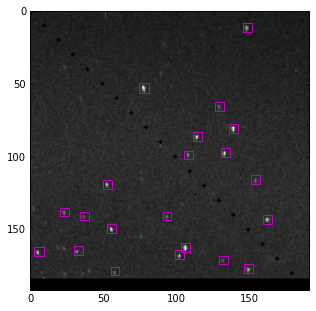

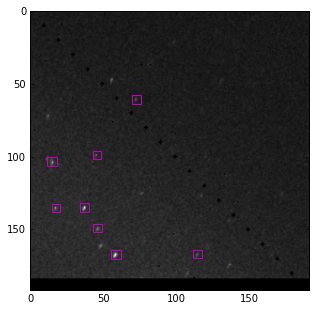

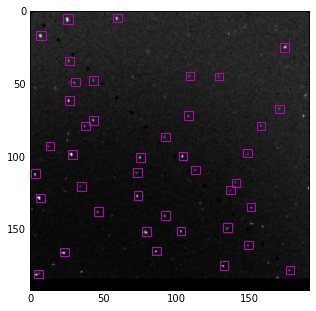

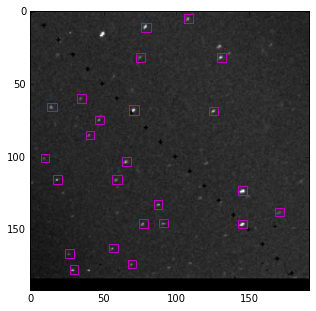

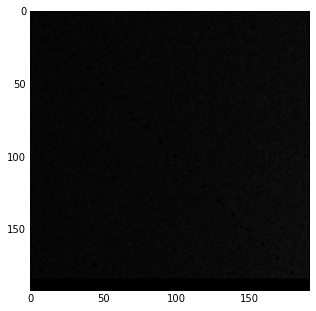

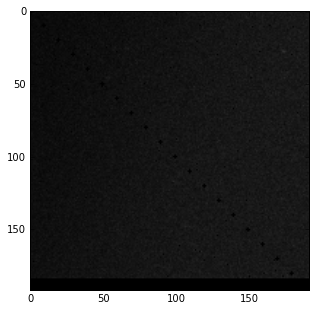

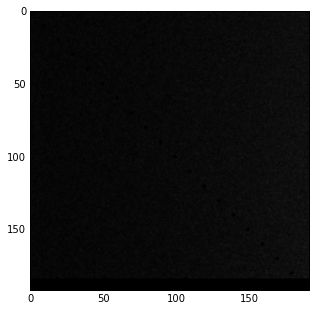

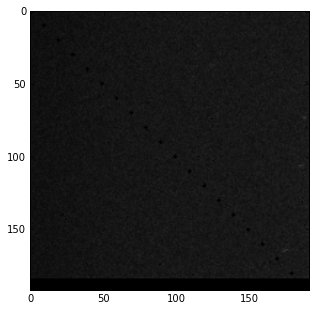

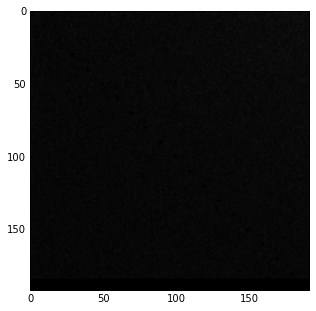

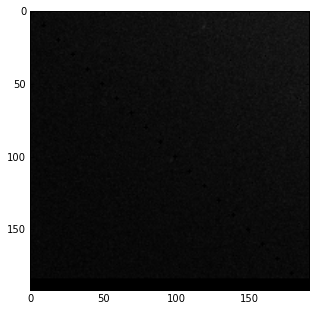

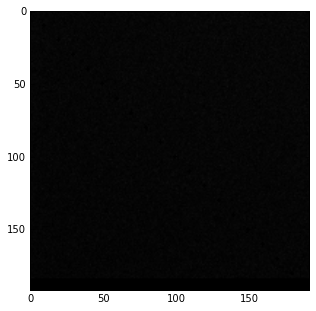

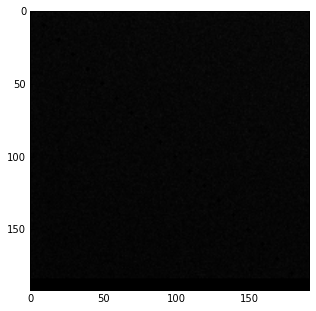

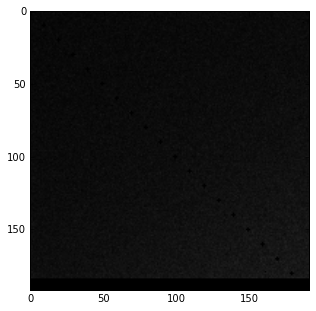

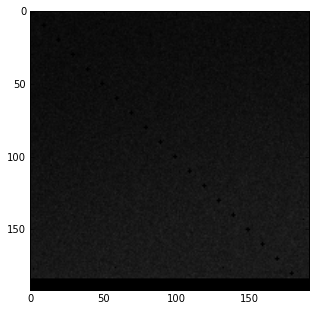

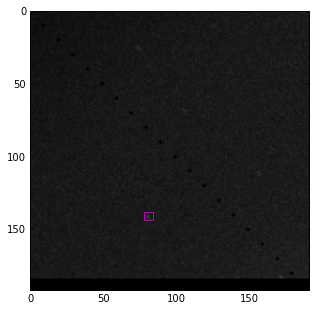

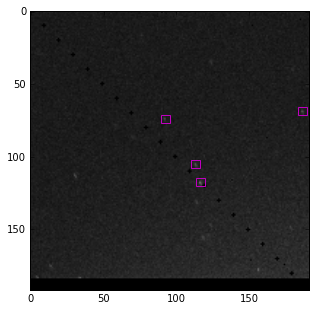

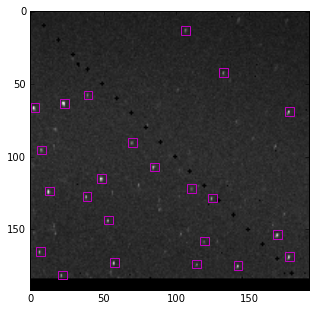

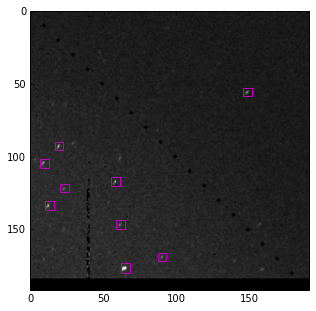

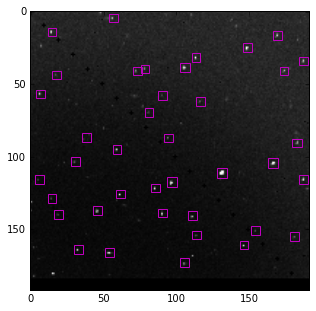

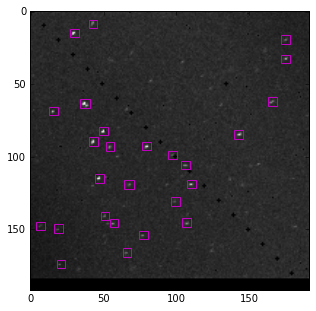

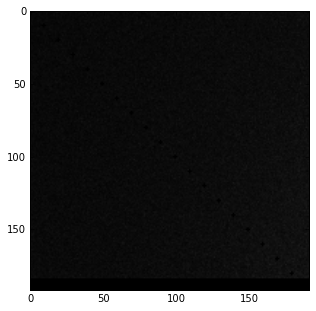

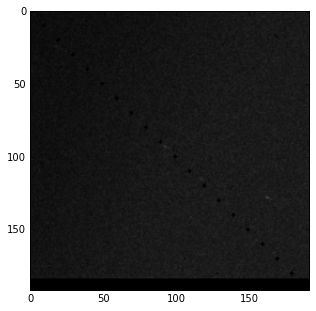

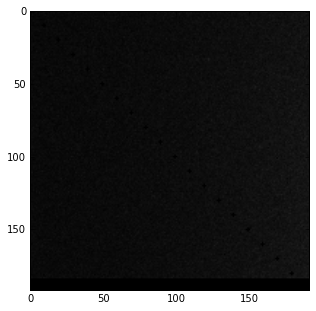

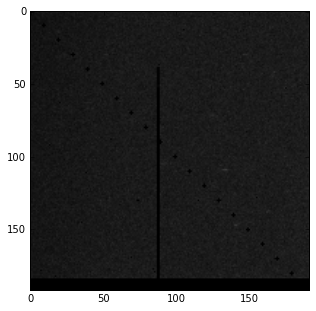

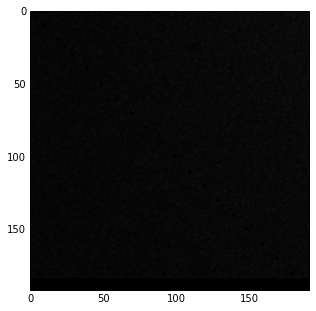

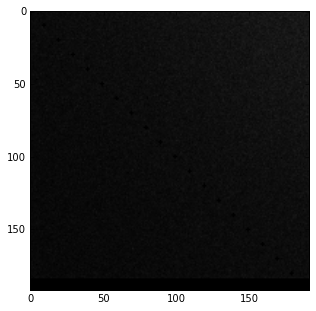

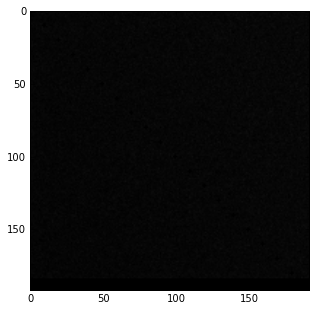

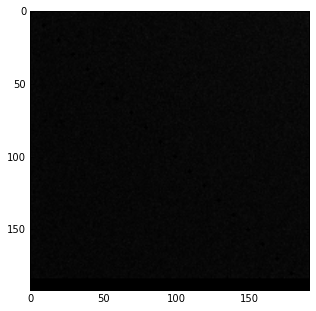

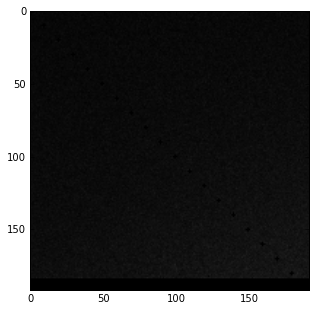

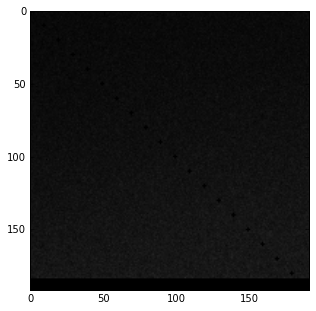

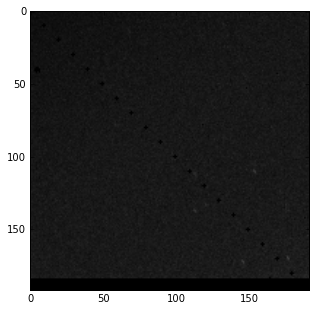

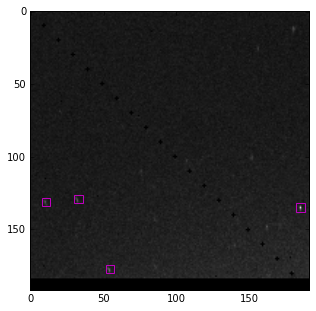

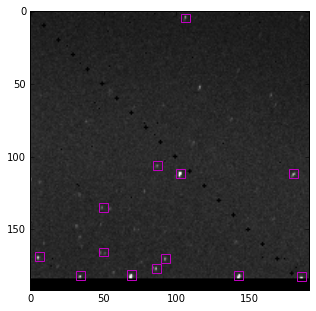

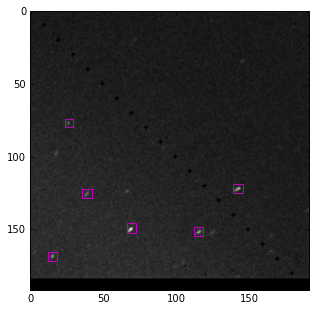

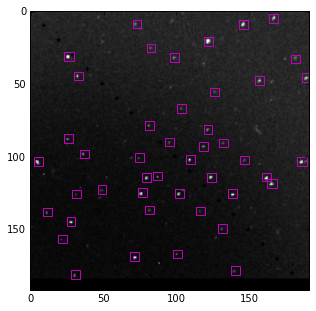

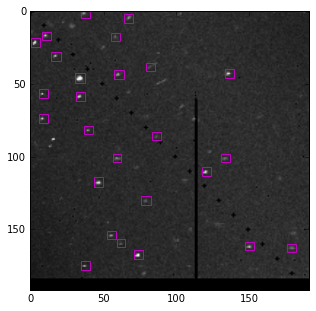

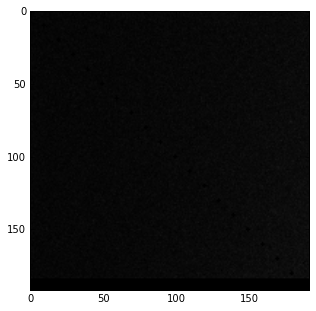

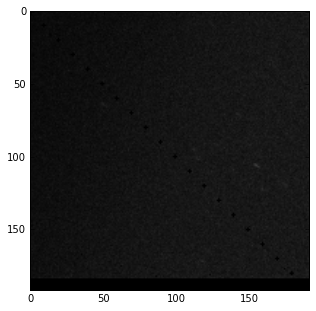

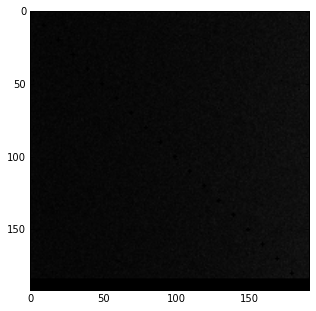

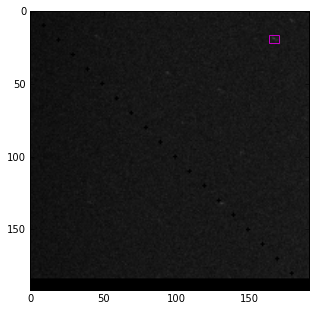

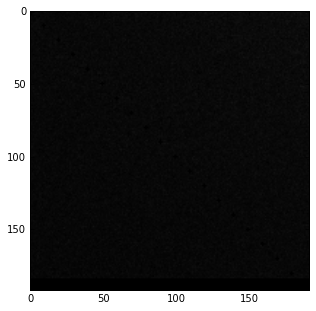

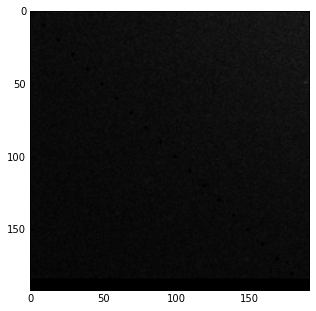

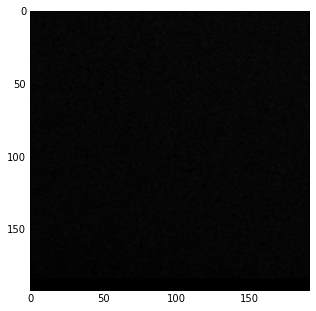

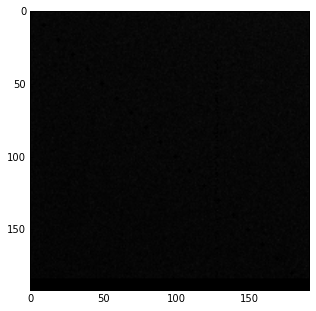

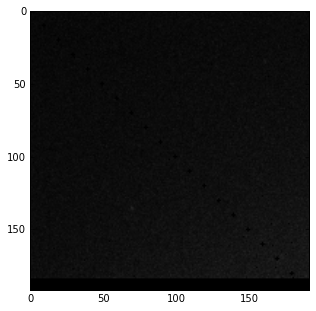

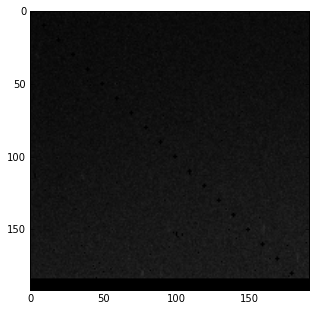

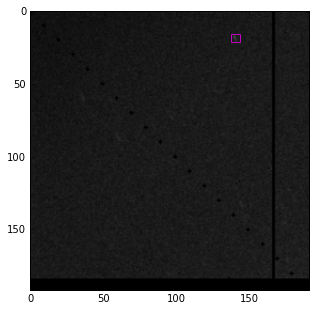

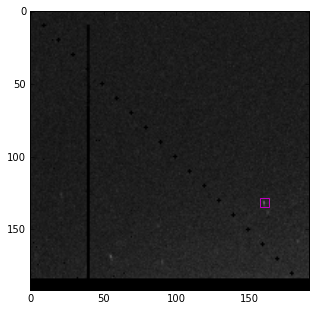

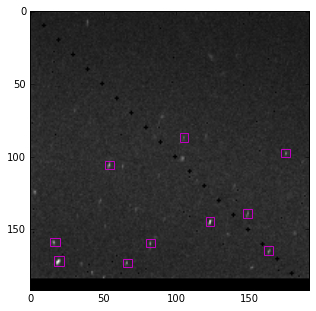

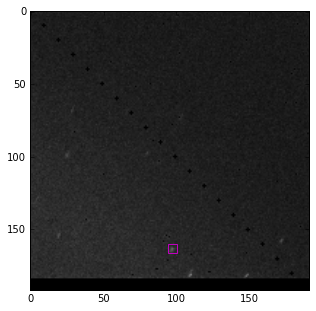

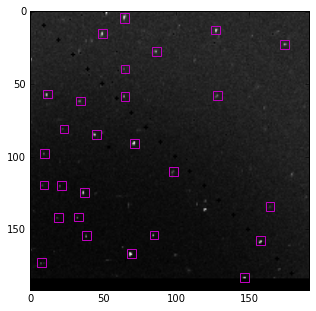

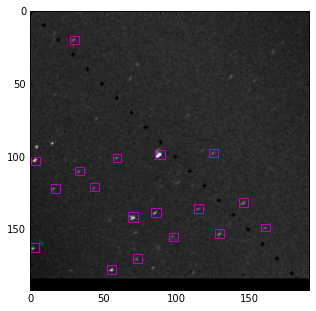

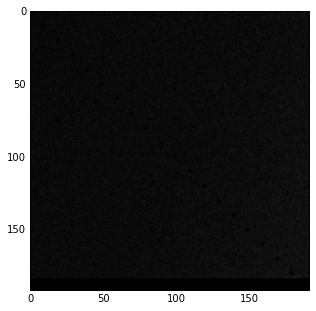

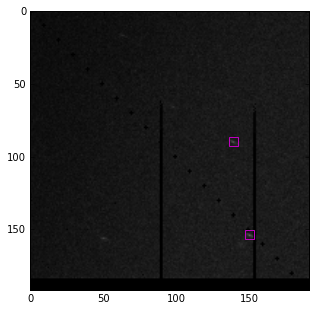

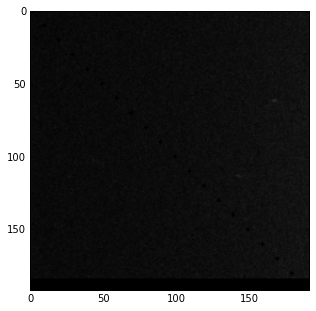

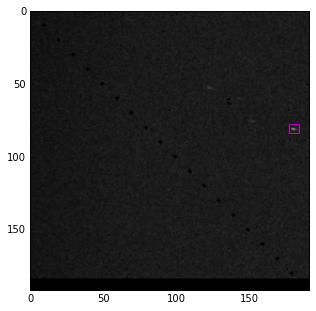

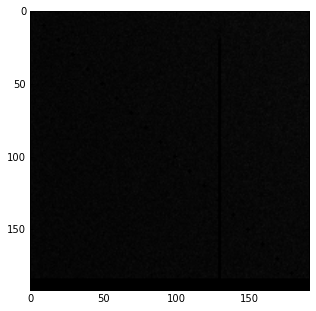

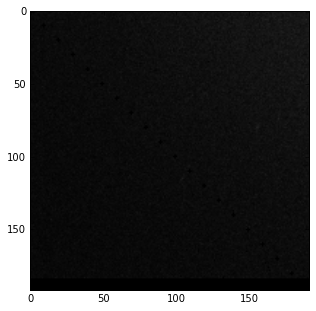

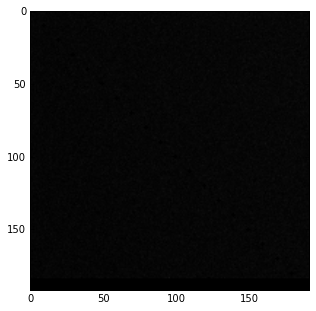

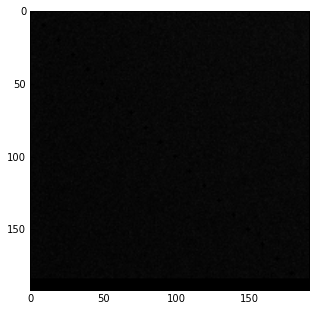

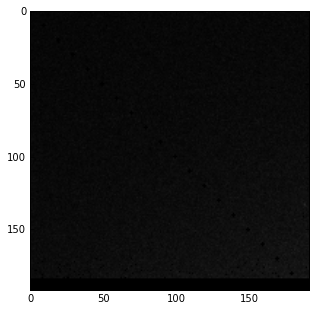

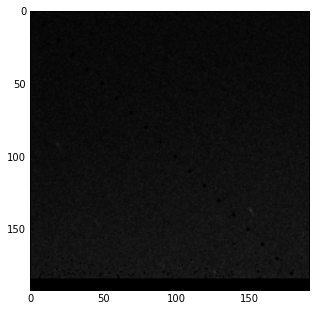

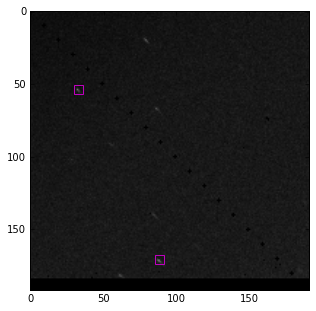

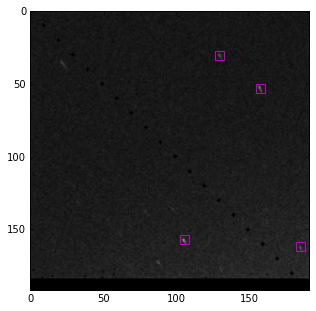

In [31]:
eventIdx = 2965
thresh = 0.25
outputFig = False
    
    
evt = this_run.event(times[eventIdx])
calib = det.calib(evt) * det.mask(evt, calib=True, status=True,
                                  edges=True, central=True,
                                  unbond=True, unbondnbrs=True)
global_max = np.max(calib)


results = {}
t0 = time.time()
for j in range(calib.shape[0]):
# for j in range(2):    
    for k in range(2):
        partNum = 2*j + k
        img = calib[j,:,(k*fs_len):((k+1)*fs_len)]
        img = np.pad( img[:,1:-1], ((0,7),(0,0)), 'constant', constant_values=0 )
        res = psnet.detect(img, thresh=thresh)
        print(len(res), "peaks detected")
        results[partNum] = res
t1 = time.time()
print("detection done in {} secs".format(str(t1-t0)))
for j in range(calib.shape[0]):
# for j in range(2):    
    for k in range(2):
        partNum = 2*j + k
        img = calib[j,:,(k*fs_len):((k+1)*fs_len)]
        img = np.pad( img[:,1:-1], ((0,7),(0,0)), 'constant', constant_values=0 )
        fig, ax = plt.subplots(1)
        im0 = plt.imshow(img, vmin=0, vmax=1*global_max, cmap=cm.gray)
        for peak in results[partNum]:
            x = peak[1][0]-0.5*peak[1][2]
            y = peak[1][1]-0.5*peak[1][3]
            w = peak[1][2]
            h = peak[1][3]
            rect = pat.Rectangle( (x, y), w, h, color="m", fill=False, linewidth=1 )
            ax.add_patch(rect)
        fig.set_size_inches(5, 5)
        if outputFig:
            plt.savefig( "output/{}_{}.png".format(str(eventIdx).zfill(6), str(partNum).zfill(2)), bbox_inces='tight', dpi=300)



In [28]:
cfgPath = "/reg/neh/home/liponan/ai/psnet/cfg/newpeaksv5-asic.cfg"
psnet = peaknet(cfgPath=cfgPath)

(29, 'peaks detected')
(69, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(4, 'peaks detected')
(29, 'peaks detected')
(64, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(4, 'peaks detected')
(17, 'peaks detected')
(70, 'peaks detected')
(0, 'peaks detected')
(1, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(0, 'peaks detected')
(2, 'peaks detected')
(13, 'peaks detected')
(49, 'peaks detected')
(2, 'peaks detected')
(1, 'peaks detected')
(0, 'peaks detected')
('found', 354, 'peaks')
detection done in 2.87476801872 secs


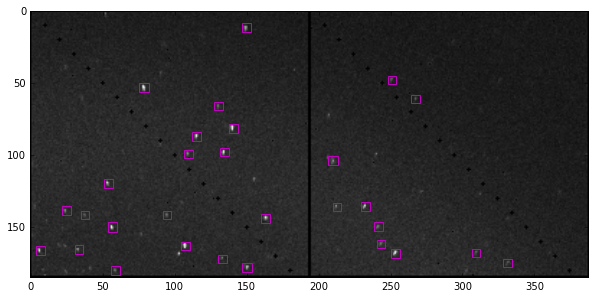

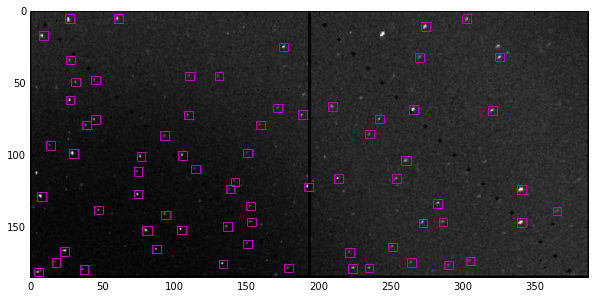

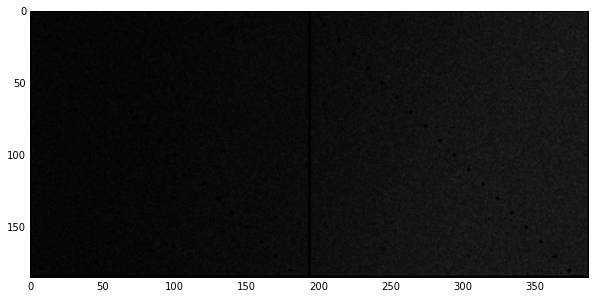

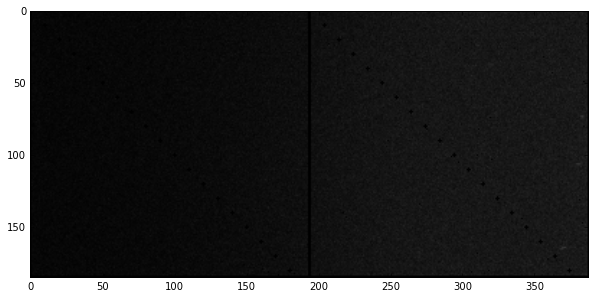

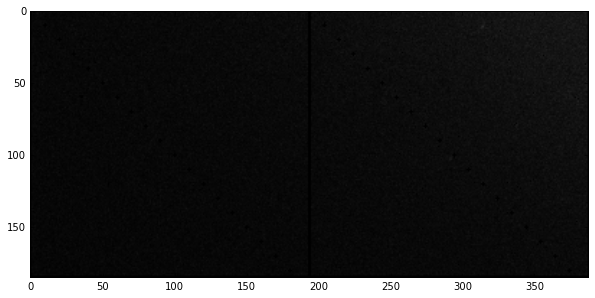

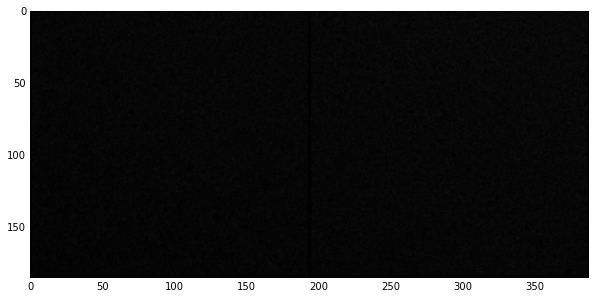

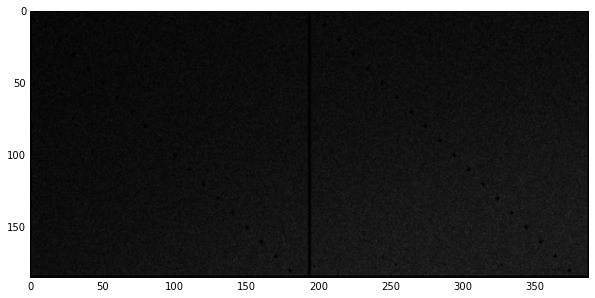

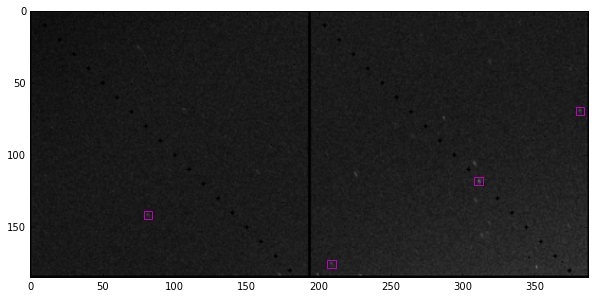

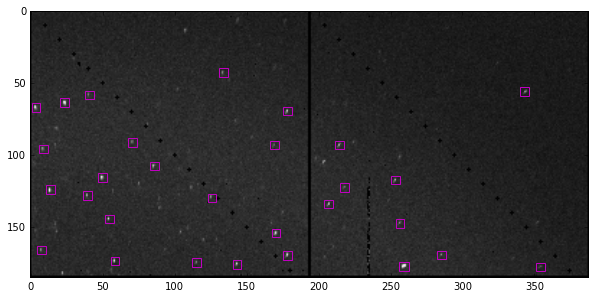

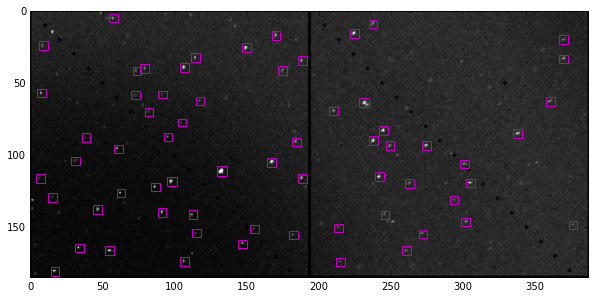

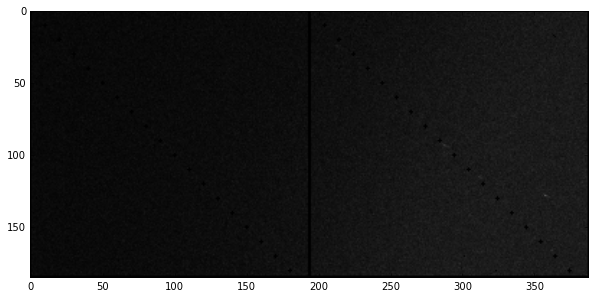

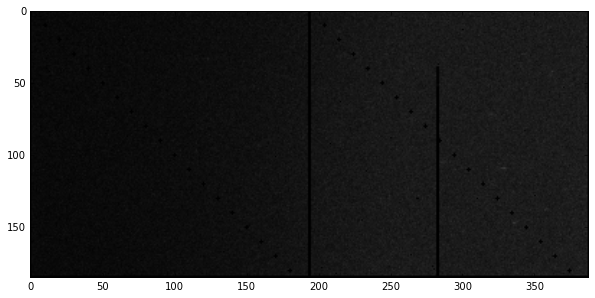

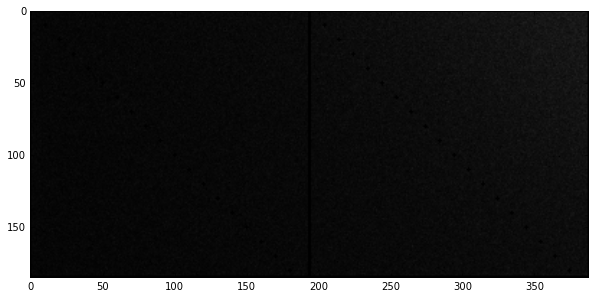

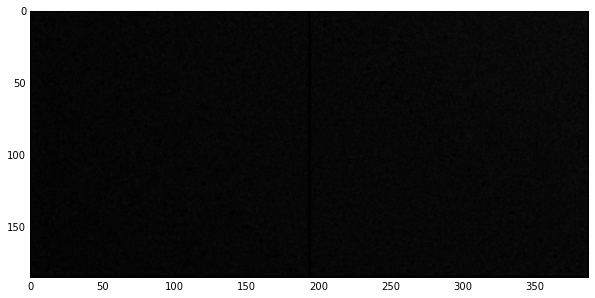

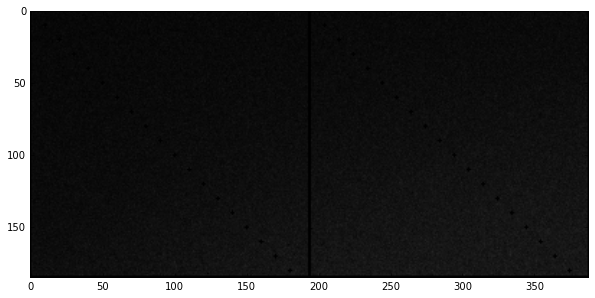

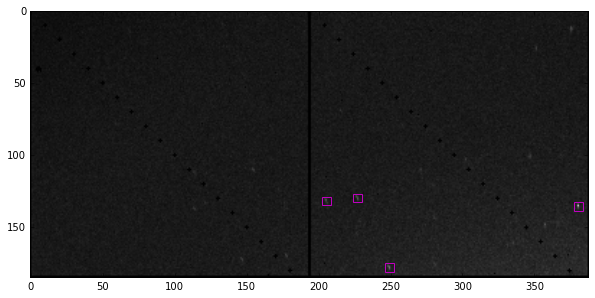

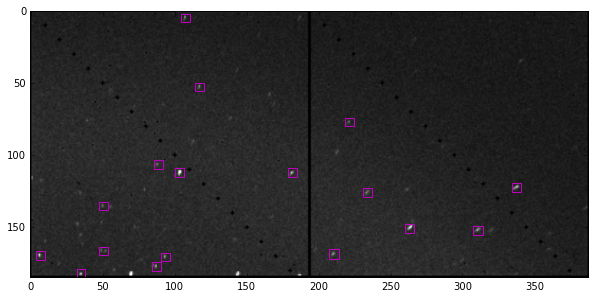

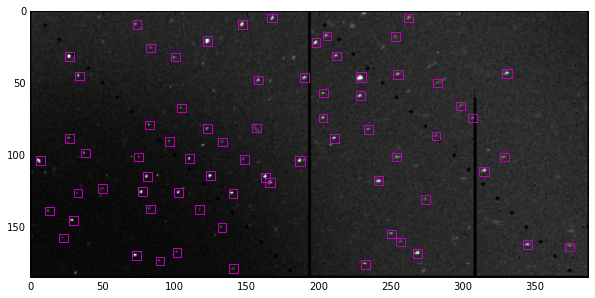

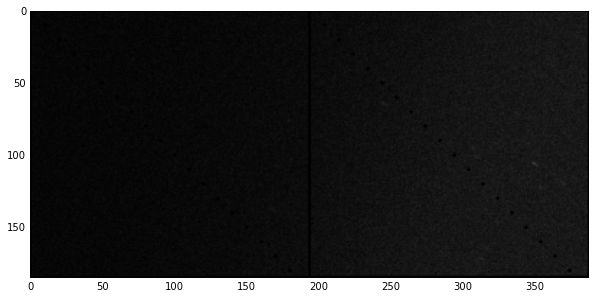

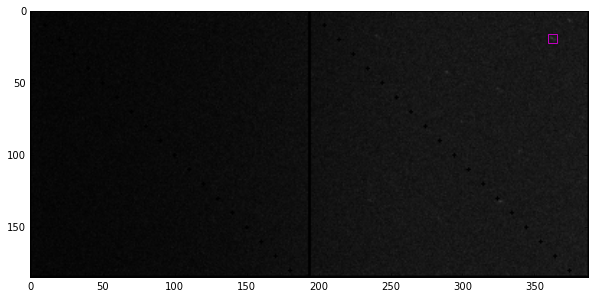

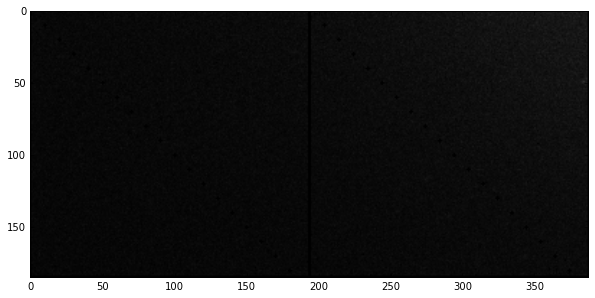

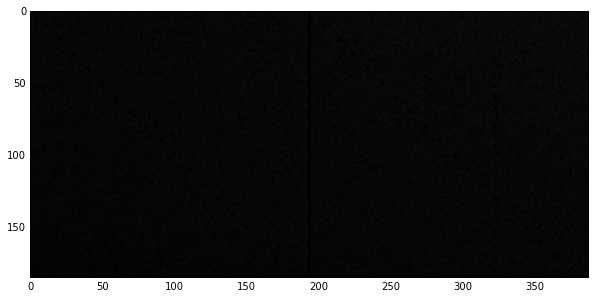

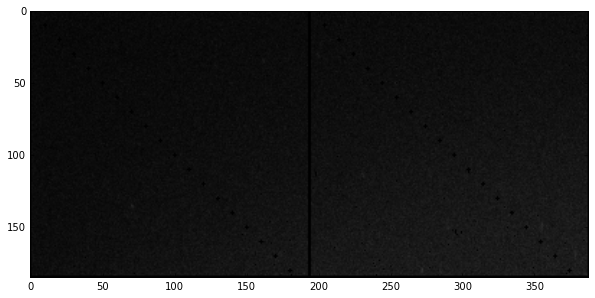

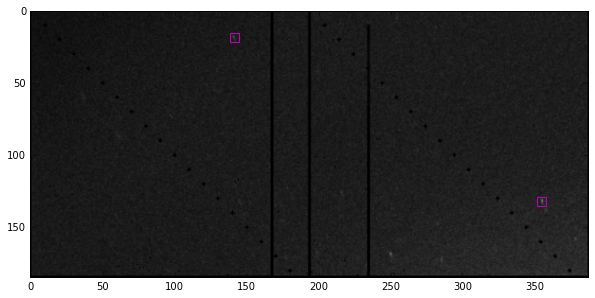

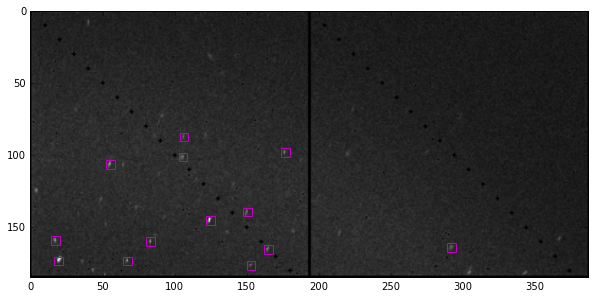

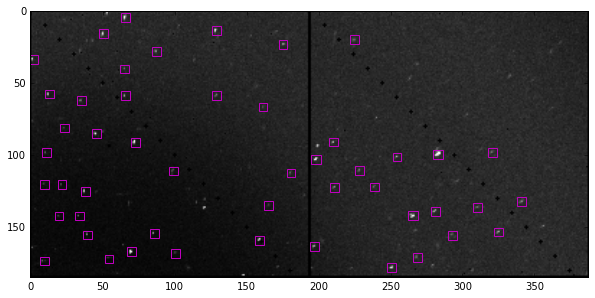

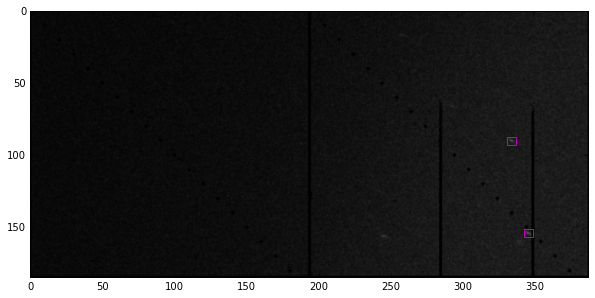

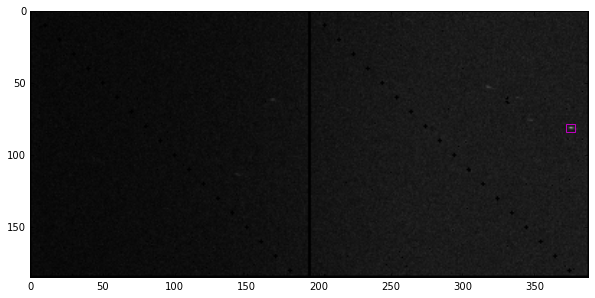

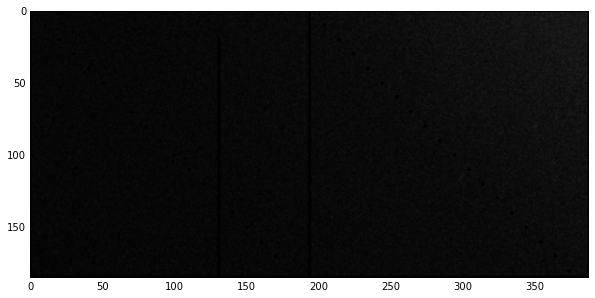

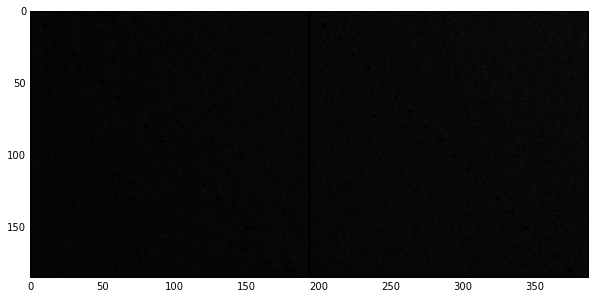

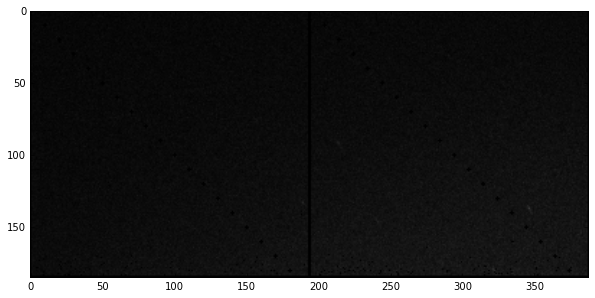

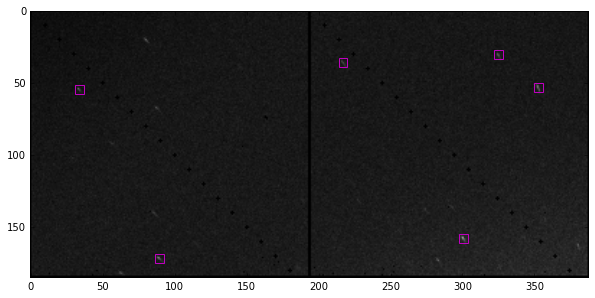

In [29]:
eventIdx = 2965
thresh = 0.25
outputFig = False
    
    
evt = this_run.event(times[eventIdx])
calib = det.calib(evt) * det.mask(evt, calib=True, status=True,
                                  edges=True, central=True,
                                  unbond=True, unbondnbrs=True)
global_max = np.max(calib)


results = {}
imgs = calib[:,:,:]
t0 = time.time()
res = psnet.detectBatch( imgs, thresh=thresh )
results = res[0]
nPeaks = 0
for j in range(len(results[0])):
    print(len(results[j]), "peaks detected")
    nPeaks += len(results[j])
t1 = time.time()
print("found", nPeaks, "peaks")
print("detection done in {} secs".format(str(t1-t0)))
for j in range(calib.shape[0]):
    img = calib[j,:,:]
    fig, ax = plt.subplots(1)
    im0 = plt.imshow(img, vmin=0, vmax=1*global_max, cmap=cm.gray)
    for peak in results[j]:
        x = peak[1][0]-0.5*peak[1][2]
        y = peak[1][1]-0.5*peak[1][3]
        w = peak[1][2]
        h = peak[1][3]
        rect = pat.Rectangle( (x, y), w, h, color="m", fill=False, linewidth=1 )
        ax.add_patch(rect)
    fig.set_size_inches(10, 5)
    if outputFig:
        plt.savefig( "output/{}_{}.png".format(str(eventIdx).zfill(6), str(j).zfill(2)), bbox_inces='tight', dpi=300)

